In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
%autosave 190

Autosaving every 190 seconds


In [4]:
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
np.sqrt(784)

28.0

There are total of 784 pixel which mean the picture must be 28 x 28.
We must convert the csv file to training pic file first.

In [183]:
df.iloc[:,1:].values.shape

(42000, 784)

In [185]:
df.iloc[:,1:].values.reshape(-1,28,28,1).shape

(42000, 28, 28, 1)

### Convert csv to training file

In [178]:
#Testing with one row
f10 = df.iloc[0:9,1:]
f10 = f10.values.reshape(-1,28, 28)
name = df.label.iloc[:9]

In [159]:
f10[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

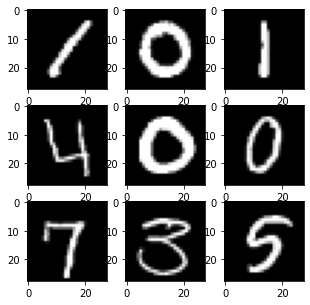

In [75]:
def exampleplot(pic):
    n = 0
    fig, axm = plt.subplots(nrows=3, ncols=3, figsize=(5, 5))
    for axs in (axm):
        for ax in (axs):
#             idx = i * 5 + j
            ax.imshow(pic[n], cmap='gray')

            n += 1

    plt.show()
        
exampleplot(f10)

We can see that the our converting method seem correct

In [86]:
#Let convert all the data file
train = df.iloc[:, 1:].values.reshape(-1, 28, 28)
label = df.label

We got the training data from csv file to number already,  
Next we will want to train the data from those train variable but first we would want to see some population of the number

In [87]:
np.array(label)

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

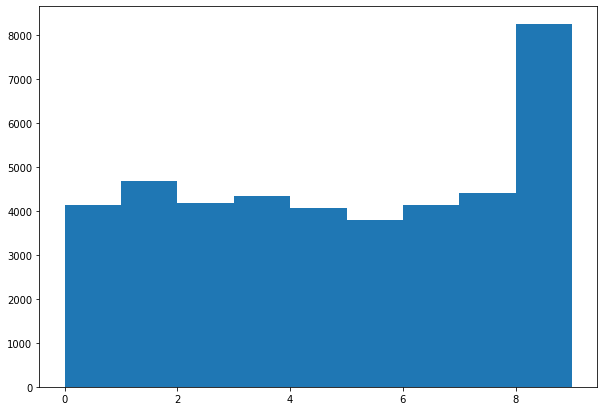

In [88]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(np.array(label), bins = [0,1,2,3,4,5,6,7,8,9])
 
# Show plot
plt.show()

it seem like the population of number nine has the most, where 0 - 8 have unifor pattern

### Start tranning


In [249]:
#all library needed for CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG19, DenseNet201, DenseNet121
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GroupShuffleSplit

Number is 1


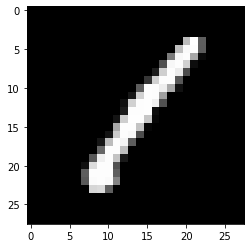

In [250]:
plt.imshow(train[0], cmap = "gray")
print("Number is", label[0])

In [251]:
model = Sequential()

In [252]:
model = tf.keras.models.Sequential([    

        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D((2, 2)),
        tf.keras.layers.Dropout(0.20),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(10, activation='softmax')
])

In [253]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)        

In [254]:
#Since there are mutiple output and we want to pick one for each output, so we use categorical_crossentropy
model.compile(optimizer='adam',
#               loss='categorical_crossentropy', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [170]:
784*32+64

25152

In [171]:
len(train)*.9, len(train)

(37800.0, 42000)

In [255]:
df.iloc[:,1:].values.reshape(-1,28,28)
#Let convert all the data file
train = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
label = df.label
train.shape

(42000, 28, 28, 1)

In [256]:
X_train = train[:37800]/255.
y_train = np.array(label[:37800])
X_test = train[37800:]/255.
y_test = np.array(label[37800:])
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [257]:
data_train = ImageDataGenerator(
    rotation_range = 8,
    zoom_range=0.1
)
data_test = ImageDataGenerator()
train_gen = data_train.flow(X_train, y_train, batch_size = 64, shuffle = True)

In [258]:
history = model.fit(train_gen, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
591/591 [==============================] - 13s 11ms/step - loss: 0.2858 - accuracy: 0.9101 - val_loss: 0.0664 - val_accuracy: 0.9776
Epoch 2/20
591/591 [==============================] - 6s 10ms/step - loss: 0.0935 - accuracy: 0.9714 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 3/20
591/591 [==============================] - 6s 10ms/step - loss: 0.0703 - accuracy: 0.9783 - val_loss: 0.0316 - val_accuracy: 0.9893
Epoch 4/20
591/591 [==============================] - 6s 11ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0349 - val_accuracy: 0.9902
Epoch 5/20
591/591 [==============================] - 6s 11ms/step - loss: 0.0539 - accuracy: 0.9830 - val_loss: 0.0292 - val_accuracy: 0.9898
Epoch 6/20
591/591 [==============================] - 6s 10ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.0278 - val_accuracy: 0.9917
Epoch 7/20
591/591 [==============================] - 6s 10ms/step - loss: 0.0426 - accuracy: 0.9862 - val_loss: 0.0251 - val_accuracy: 0.992

### Let Check the result!

In [259]:
def plot_history(history):    
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc)
    plt.plot(x, val_acc)
    plt.title('Accuracy vs. No. of epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(x, loss)
    plt.plot(x, val_loss)
    plt.title('Loss vs. No. of epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()

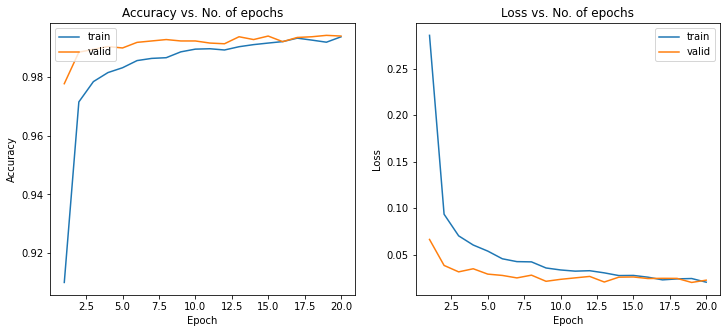

In [260]:
plot_history(history)

In [264]:
results = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))

Test Loss: 0.02268
Test Accuracy: 99.38%


### Saving Model

In [261]:
# model.save("Digit_Recongnizer_model1_temp1.h5")

### Loading Model

In [262]:
m1 = tf.keras.models.load_model("Digit_Recongnizer_model1_temp1.h5")

In [263]:
m1